# Sparse Stereo Analysis
### import python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import sys
from scipy.stats import mannwhitneyu,ttest_ind

In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-d

## <font color='red'>Section 1: Gaussian Blur </font> 

#### define column name

In [2]:
name = ['id','p','r1','r2','exy','ez']

#### get data

In [3]:
data = [[],[]]
mi = 0
for m in ['RGB','carn']:
    for n in [0,10,20,50,100]:
        df1 = pd.read_csv('sparse_analysis_blur/sparse_analysis_'+m+'_blur'+str(n)+'.csv').to_numpy()
        df1 = pd.DataFrame(df1[:,:-1],columns=name)
        data[mi].append(df1)
    mi += 1
data = np.array(data)
data.shape

(2, 5, 47, 6)

#### visualization using box plot

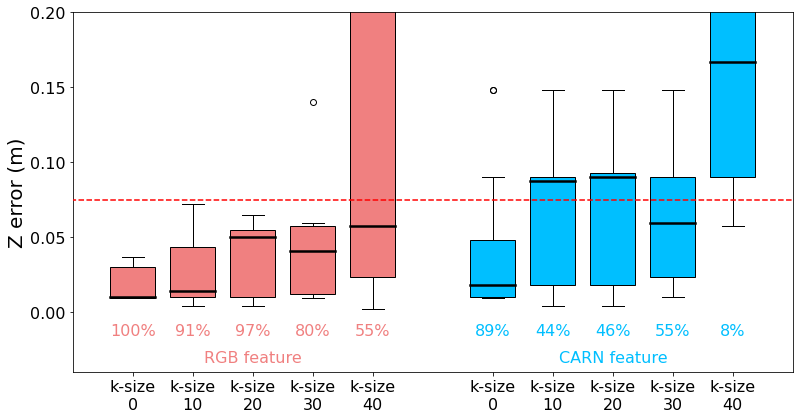

In [4]:
fig = plt.figure(figsize =(10, 5))

colors = ['lightcoral', 'deepskyblue', 'lightgreen']
labels = ['0','10','20','30','40']
algos = ['RGB feature','CARN feature']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data_id = -1
for i in range(data.shape[1]):
    for m in range(2):
        bp = ax.boxplot([data[m,i,:,data_id]],showfliers=True,medianprops=medianprops,positions=[1.2*m+0.2*i],
                        patch_artist=True,labels=['k-size\n'+labels[i%5]])
        for patch in bp['boxes']:
            patch.set_facecolor(colors[m])
        succrate = np.count_nonzero(data[m,i,:,data_id] < 0.07)/np.count_nonzero(data[m,i,:,data_id] > -1)
        succrate = int(100*succrate)
        ax.text(1.2*m+0.2*i,-0.017,str(succrate)+'%',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                       ha='center', va='bottom',c=colors[m],fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    
for i in range(2):
    ax.text(0.4+1.2*i,-0.035,algos[i],bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                   ha='center', va='bottom',c=colors[i],fontsize=16)

plt.ylabel("Z error (m)",fontsize=20)
plt.plot([-1,3],[0.075,0.075],c='red',ls='--',zorder=10)
plt.ylim([-0.04,0.2])
plt.xlim([-0.2,2.2])
plt.show()

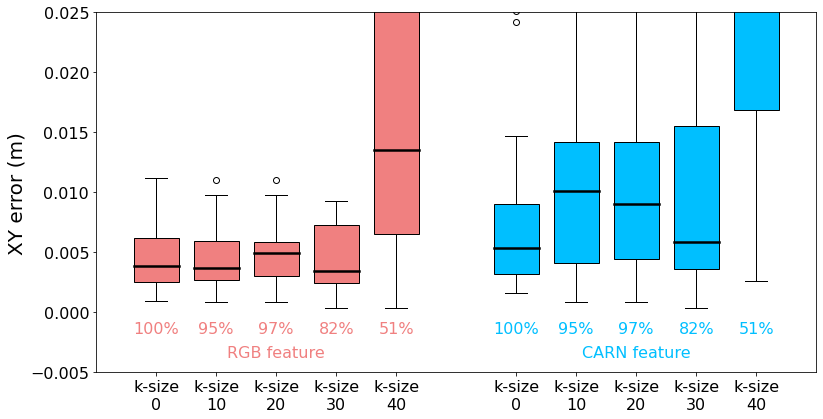

In [5]:
fig = plt.figure(figsize =(10, 5))

colors = ['lightcoral', 'deepskyblue', 'lightgreen']
labels = ['0','10','20','30','40']
algos = ['RGB feature','CARN feature']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data_id = -2
for i in range(data.shape[1]):
    for m in range(2):
        bp = ax.boxplot([data[m,i,:,data_id]],showfliers=True,medianprops=medianprops,positions=[1.2*m+0.2*i],
                        patch_artist=True,labels=['k-size\n'+labels[i%5]])
        for patch in bp['boxes']:
            patch.set_facecolor(colors[m])
        succrate = np.count_nonzero(data[m,i,:,data_id] < 0.075)/np.count_nonzero(data[m,i,:,data_id] > -1)
        succrate = int(100*succrate)
        ax.text(1.2*m+0.2*i,-0.002,str(succrate)+'%',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                       ha='center', va='bottom',c=colors[m],fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    
for i in range(2):
    ax.text(0.4+1.2*i,-0.004,algos[i],bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                   ha='center', va='bottom',c=colors[i],fontsize=16)

plt.ylabel("XY error (m)",fontsize=20)
plt.plot([-1,3],[0.075,0.075],c='red',ls='--',zorder=10)
plt.ylim([-0.005,0.025])
plt.xlim([-0.2,2.2])
plt.show()

## <font color='red'>Section 2: Gaussian Noise </font> 

In [6]:
name = ['noise','id','p','r1','r2','exy','ez','er']
df1 = pd.read_csv('sparse_analysis_blur/sparse_analysis_noise3.csv').to_numpy()
#df2 = pd.read_csv('sparse_analysis_blur/sparse_analysis_noise.csv').to_numpy()
#data = np.concatenate([df1,df2],axis=0)
data = pd.DataFrame(df1[:,:-1],columns=name)
data

,noise,id,p,r1,r2,exy,ez,er
0,25.0,2.1,0.0,1.51975,0.0,0.304138,0.800000,3.09054
1,25.0,2.2,0.0,1.51975,0.0,0.304138,0.800000,3.09054
2,25.0,2.3,0.0,1.51975,0.0,0.304138,0.800000,3.09054
3,25.0,2.4,0.0,1.51975,0.0,0.304138,0.800000,3.09054
4,25.0,0.0,0.0,1.47596,0.0,0.304138,0.800000,0.00000
...,...,...,...,...,...,...,...,...
1439,0.0,2.0,7.0,-2.27174,1.0,0.005659,0.027213,0.00000
1440,0.0,2.1,7.0,-2.27174,1.0,0.005659,0.027213,0.00000
1441,0.0,2.2,7.0,-2.27174,1.0,0.005659,0.027213,0.00000
1442,0.0,2.3,7.0,-2.27174,1.0,0.005659,0.027213,0.00000


In [19]:
df1 = pd.read_csv('sparse_analysis_blur/sparse_analysis_noise3.csv').to_numpy()[:,:-1]
dr = df1[:,-1]
dr_ = np.min(np.abs(np.array([3.14-dr,dr,3.14/2-dr,-3.14/2+dr,-3.14+dr,-dr,
                             3.14*2-dr,dr,2*3.14/2-dr,-2*3.14/2+dr,-2*3.14+dr,-dr])),axis=0)
df1[:,-1] = dr_
data = pd.DataFrame(df1,columns=name)
data


,noise,id,p,r1,r2,exy,ez,er
0,25.0,2.1,0.0,1.51975,0.0,0.304138,0.800000,0.04946
1,25.0,2.2,0.0,1.51975,0.0,0.304138,0.800000,0.04946
2,25.0,2.3,0.0,1.51975,0.0,0.304138,0.800000,0.04946
3,25.0,2.4,0.0,1.51975,0.0,0.304138,0.800000,0.04946
4,25.0,0.0,0.0,1.47596,0.0,0.304138,0.800000,0.00000
...,...,...,...,...,...,...,...,...
1439,0.0,2.0,7.0,-2.27174,1.0,0.005659,0.027213,0.00000
1440,0.0,2.1,7.0,-2.27174,1.0,0.005659,0.027213,0.00000
1441,0.0,2.2,7.0,-2.27174,1.0,0.005659,0.027213,0.00000
1442,0.0,2.3,7.0,-2.27174,1.0,0.005659,0.027213,0.00000


#### Visualiation

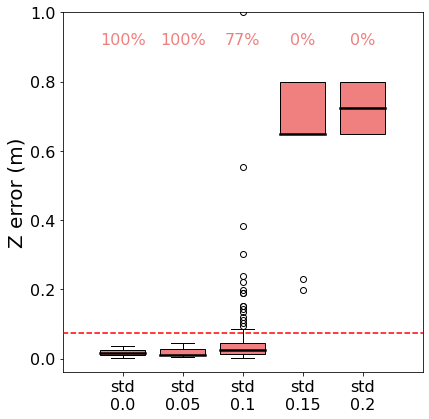

In [20]:
fig = plt.figure(figsize =(5, 5))

colors = ['lightcoral', 'deepskyblue', 'lightgreen']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data_id = 'ez'
m = 0
for n in range(5):
    noise = n*5
    data_i = data.loc[data['noise']==noise][data_id].to_numpy()
    bp = ax.boxplot([data_i],showfliers=True,medianprops=medianprops,positions=[0.2*n],
                        patch_artist=True,labels=['std\n'+str(noise/100)])
    for patch in bp['boxes']:
        patch.set_facecolor(colors[m])
    succrate = np.count_nonzero(data_i < 0.075)/np.count_nonzero(data_i > -1)
    succrate = int(100*succrate)
    ax.text(0.2*n,0.9,str(succrate)+'%',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                       ha='center', va='bottom',c=colors[m],fontsize=16)
        
    ax.tick_params(axis='both', which='major', labelsize=16)


plt.ylabel("Z error (m)",fontsize=20)
plt.plot([-1,3],[0.075,0.075],c='red',ls='--',zorder=10)
plt.ylim([-0.04,1])
plt.xlim([-0.2,1.0])
plt.show()

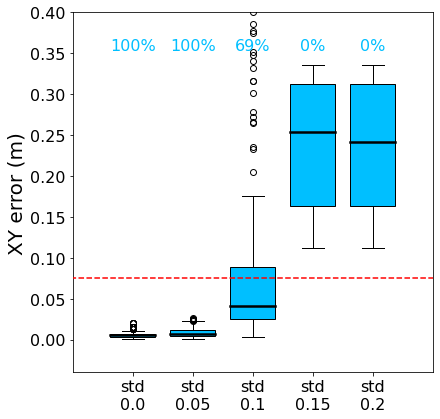

In [21]:
fig = plt.figure(figsize =(5, 5))

colors = ['lightcoral', 'deepskyblue', 'lightgreen']
labels = ['0','10','30','50','70']
algos = ['RGB feature','CARN feature']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data_id = 'exy'
m = 1
for n in range(5):
    noise = n*5
    data_i = data.loc[data['noise']==noise][data_id].to_numpy()
    bp = ax.boxplot([data_i],showfliers=True,medianprops=medianprops,positions=[0.2*n],
                        patch_artist=True,labels=['std\n'+str(noise/100)])
    for patch in bp['boxes']:
        patch.set_facecolor(colors[m])
    succrate = np.count_nonzero(data_i < 0.075)/np.count_nonzero(data_i > -1)
    succrate = int(100*succrate)
    ax.text(0.2*n,0.35,str(succrate)+'%',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                       ha='center', va='bottom',c=colors[m],fontsize=16)
        
    ax.tick_params(axis='both', which='major', labelsize=16)

plt.ylabel("XY error (m)",fontsize=20)
plt.plot([-1,3],[0.075,0.075],c='red',ls='--',zorder=10)
plt.ylim([-0.04,0.4])
plt.xlim([-0.2,1.0])
plt.show()

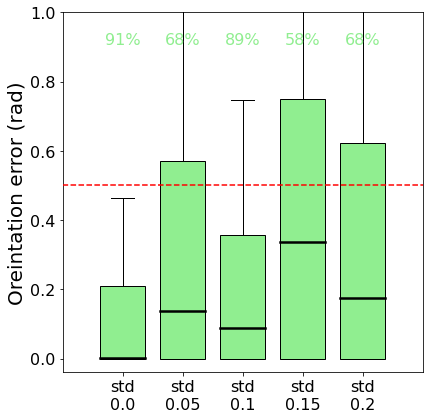

In [22]:
fig = plt.figure(figsize =(5, 5))

colors = ['lightcoral', 'deepskyblue', 'lightgreen']
labels = ['0','10','30','50','70']
algos = ['RGB feature','CARN feature']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
data_id = 'er'
m = 2
for n in range(5):
    noise = n*5
    data_i = data.loc[data['noise']==noise][data_id].to_numpy()
    bp = ax.boxplot([data_i],showfliers=False,medianprops=medianprops,positions=[0.2*n],
                        patch_artist=True,labels=['std\n'+str(noise/100)])
    for patch in bp['boxes']:
        patch.set_facecolor(colors[m])
    succrate = np.count_nonzero(data_i < 0.50)/np.count_nonzero(data_i > -1)
    succrate = int(100*succrate)
    ax.text(0.2*n,0.9,str(succrate)+'%',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                       ha='center', va='bottom',c=colors[m],fontsize=16)
        
    ax.tick_params(axis='both', which='major', labelsize=16)

plt.ylabel("Oreintation error (rad)",fontsize=20)
plt.plot([-1,3],[0.5,0.5],c='red',ls='--',zorder=10)
plt.ylim([-0.04,1])
plt.xlim([-0.2,1.0])
plt.show()